In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('F:\creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud=data.loc[data['Class']==1]

In [6]:
len(fraud)

492

In [7]:
normal=data.loc[data['Class']==0]

In [8]:
len(normal)

284315

In [9]:
import seaborn as sns


In [10]:
import matplotlib.pyplot as  plt 
plt.style.use('fivethirtyeight')

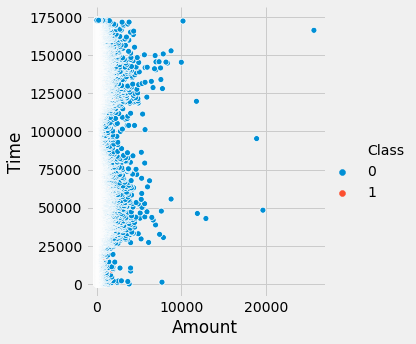

In [11]:
sns.relplot(x='Amount',y='Time',data=data, hue='Class', kind='scatter')

In [12]:
from sklearn import linear_model

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x=data.iloc[:,:-1]
y=data['Class']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

In [17]:
clf=linear_model.LogisticRegression()

In [18]:
clf.fit(x_train, y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_predict=np.array(clf.predict(x_test))
y=np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
print(confusion_matrix(y_test, y_predict))

[[99475    38]
 [   55   115]]


In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99513
           1       0.75      0.68      0.71       170

    accuracy                           1.00     99683
   macro avg       0.88      0.84      0.86     99683
weighted avg       1.00      1.00      1.00     99683



In [26]:
print(accuracy_score(y_test, y_predict))

0.9990670425248036
